In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import caffe
batch_size = 64
caffe.set_mode_cpu()
model = 'conv.prototxt'
weights = 'deep_iter_50000.caffemodel'
net = caffe.Net(model, weights, caffe.TEST)

In [2]:
print  [(k, v.data.shape) for k, v in net.blobs.items()]

[('data', (64, 1, 36, 36)), ('label', (64,)), ('label_Trainset_1_split_0', (64,)), ('label_Trainset_1_split_1', (64,)), ('conv1', (64, 5, 32, 32)), ('pool1', (64, 5, 16, 16)), ('conv2', (64, 20, 12, 12)), ('pool2', (64, 20, 6, 6)), ('ip1', (64, 20)), ('ip2', (64, 2)), ('ip2_ip2_0_split_0', (64, 2)), ('ip2_ip2_0_split_1', (64, 2)), ('accuracy', ()), ('loss', ())]


In [3]:
accuracy = 0
batch_size = net.blobs['data'].num
test_iters = (26950+64770) / 64
for i in range(test_iters):
    net.forward()
    accuracy += net.blobs['accuracy'].data
accuracy /= test_iters

print "Accuracy: {}".format(accuracy)
print accuracy * (26950+64770)

Accuracy: 0.928624389393
85173.4289951


In [4]:
batch_size = 256
model_test = 'deploy.prototxt'
net_test = caffe.Net(model_test, weights, caffe.TEST)

In [5]:
faces = 0
count = 0
test_iters = (6831 + 632 + 165) / batch_size
for i in range(test_iters):
    out = net_test.forward()
    for i in range(batch_size):
        count += 1
        if net_test.blobs['prob'].data[i].argmax():
            faces += 1
print count, faces, faces * 1.0 / count

7424 5724 0.771012931034


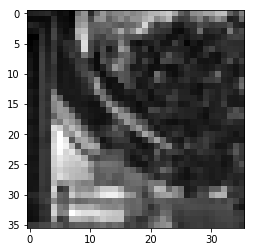

1


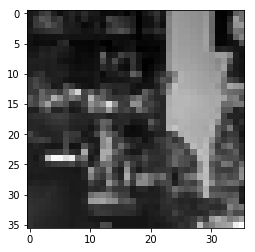

1


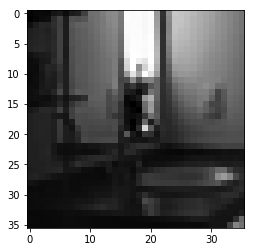

1


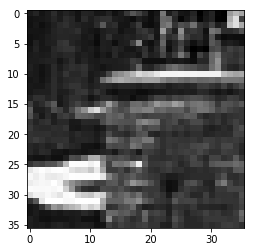

1


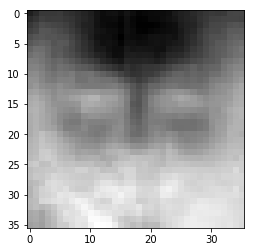

1


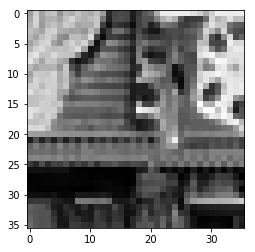

1


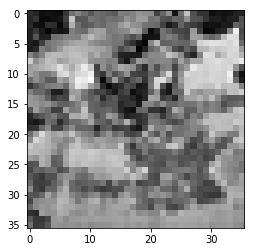

0


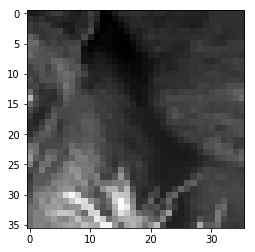

1


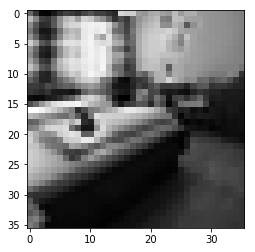

0


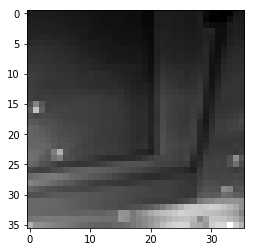

1


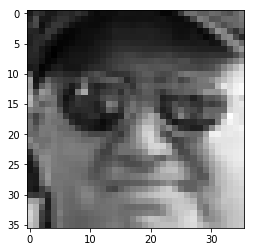

1


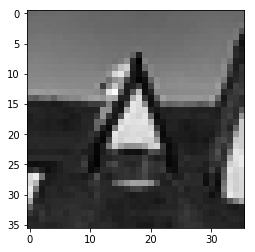

1


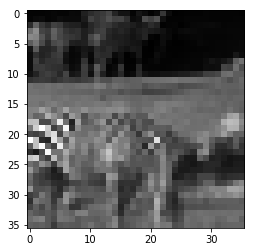

1


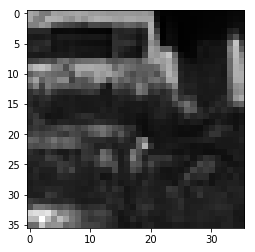

0


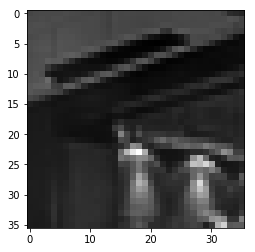

1


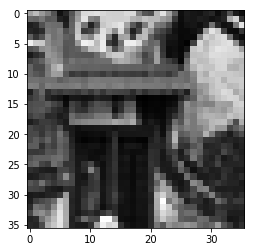

1


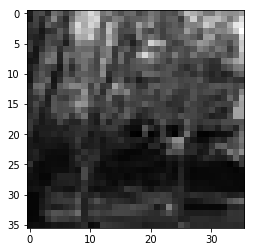

1


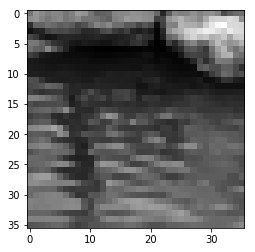

1


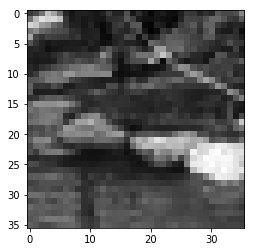

0


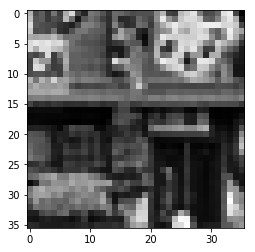

1


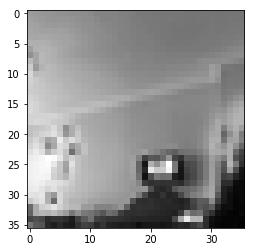

1


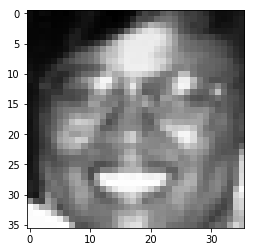

1


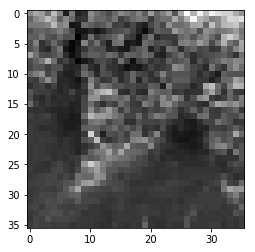

1


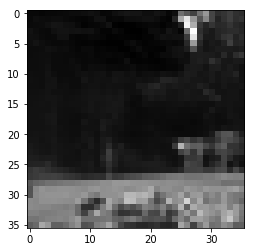

0


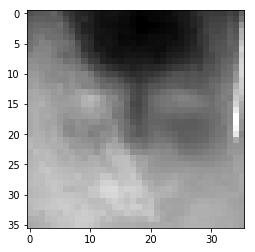

0


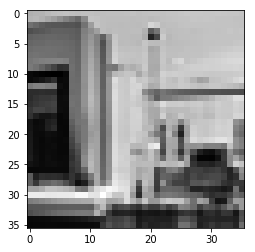

1


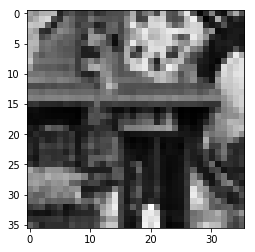

1


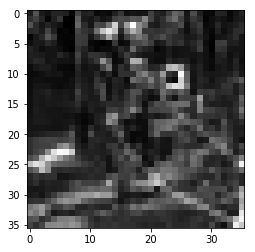

1


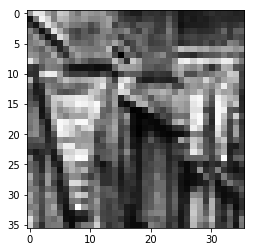

1


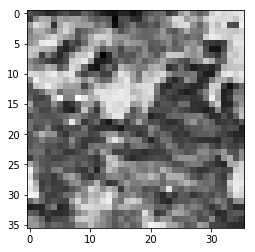

1


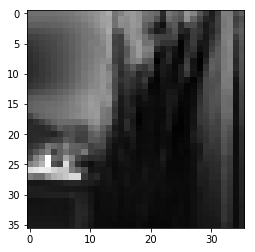

1


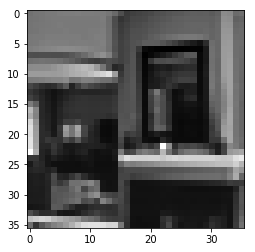

0


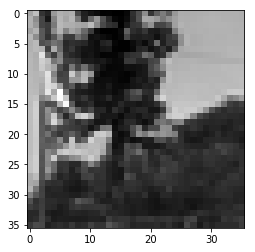

1


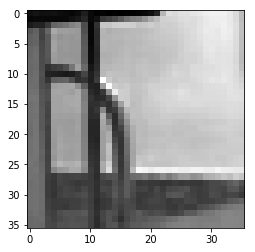

1


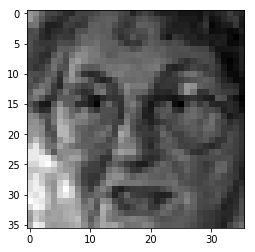

1


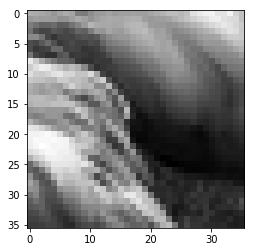

1


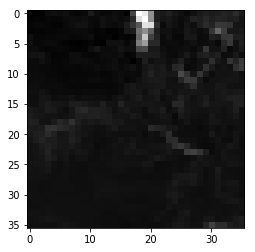

1


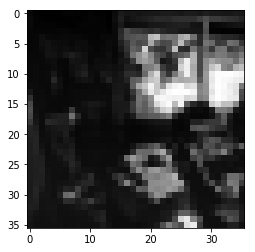

1


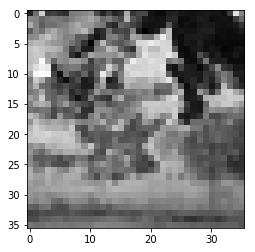

1


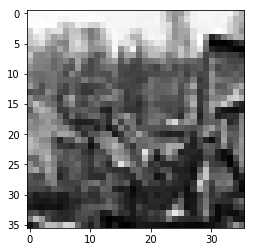

1


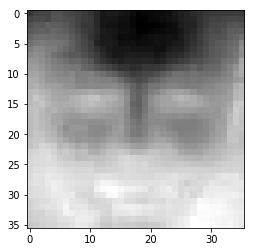

0


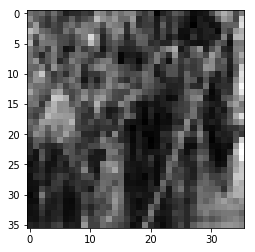

1


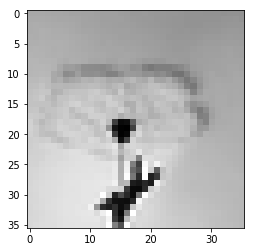

0


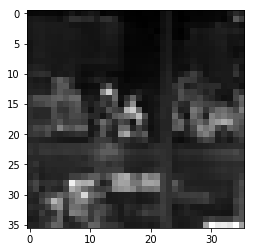

1


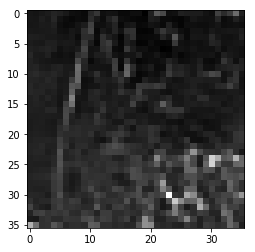

1


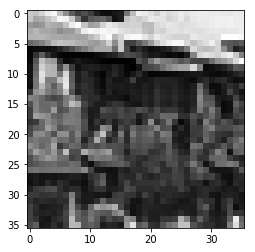

1


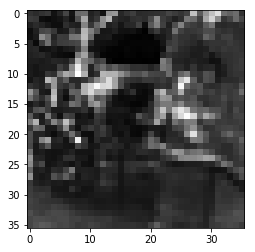

1


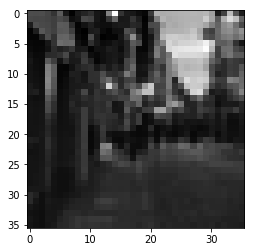

1


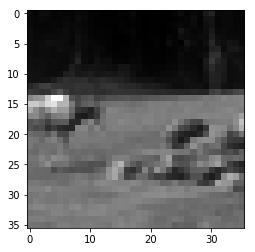

1


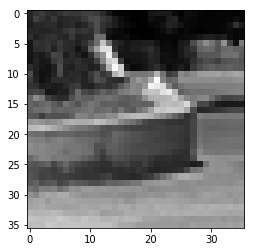

1


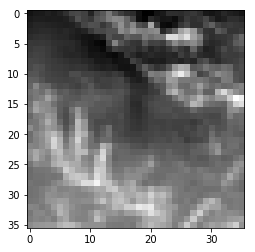

0


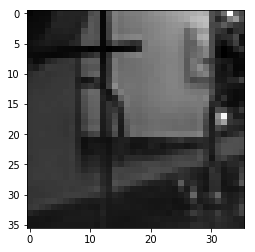

1


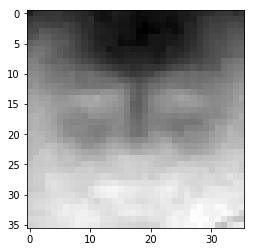

1


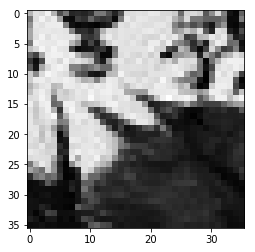

1


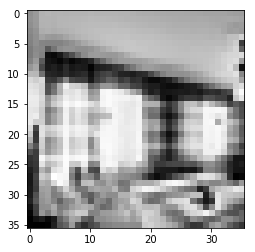

1


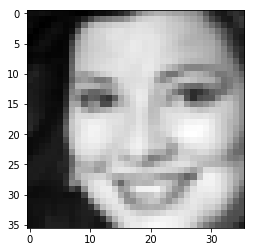

0


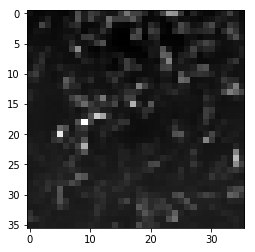

1


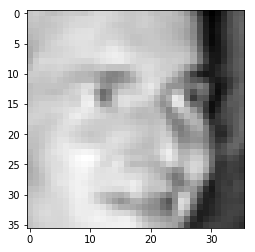

1


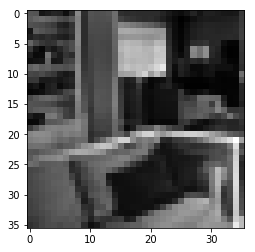

1


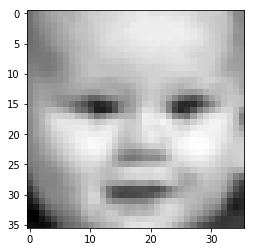

0


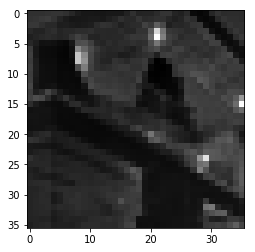

1


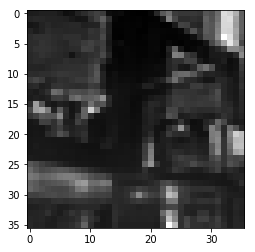

1


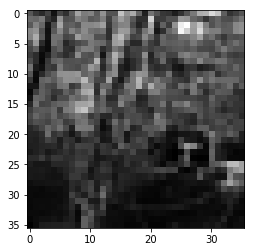

1


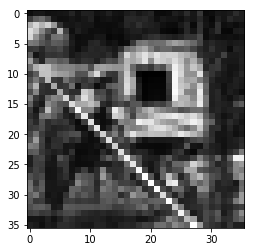

1


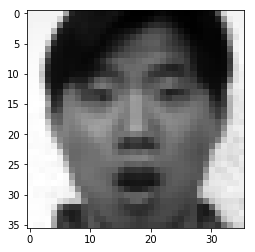

1


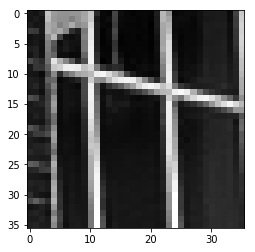

1


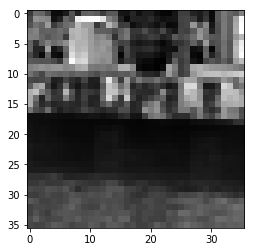

1


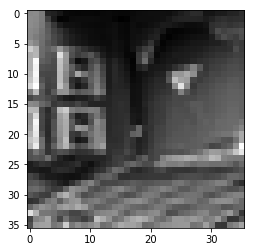

1


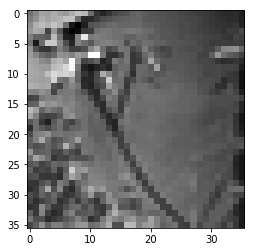

1


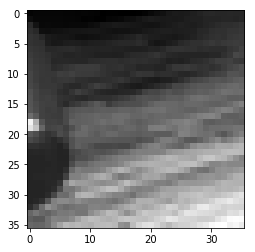

1


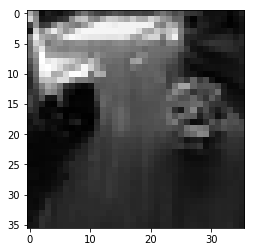

1


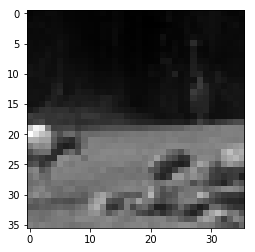

0


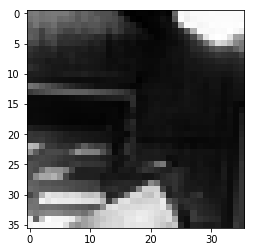

1


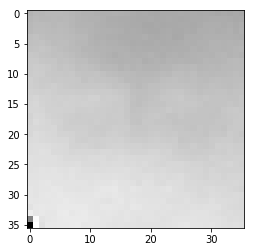

0


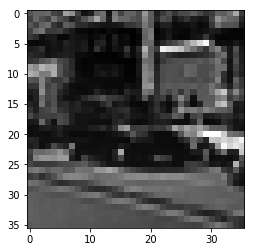

1


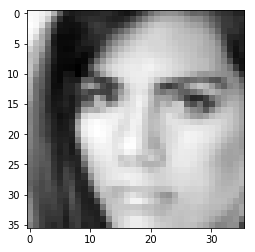

0


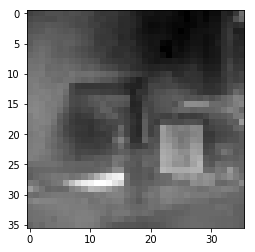

0


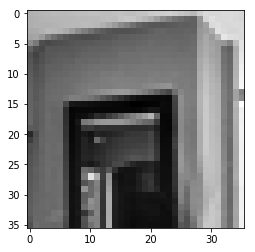

1


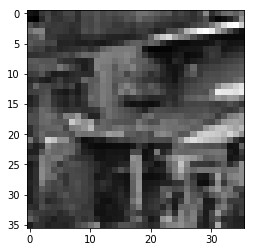

1


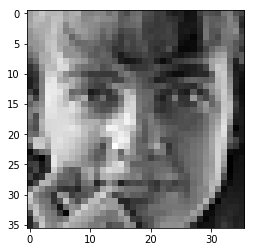

1


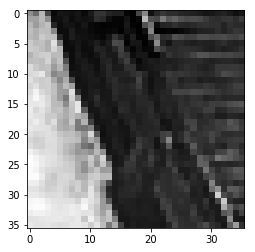

0


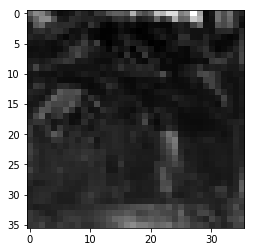

1


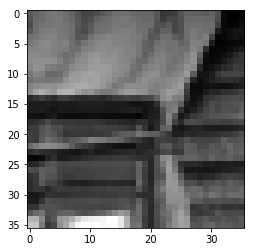

1


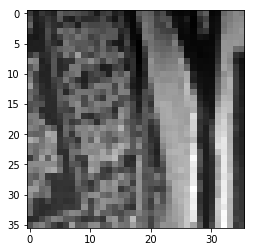

1


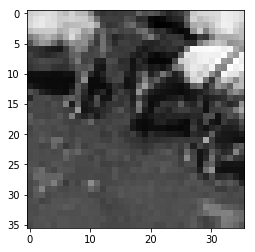

0


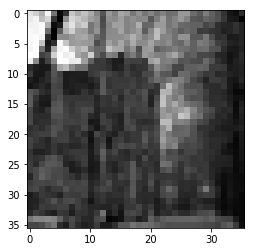

1


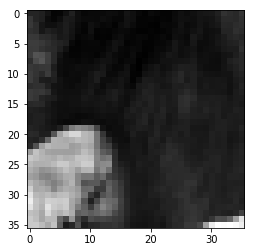

0


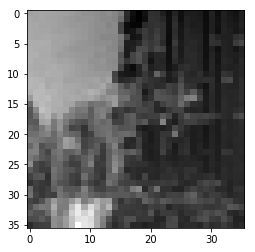

1


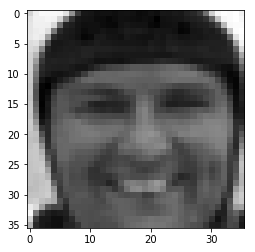

1


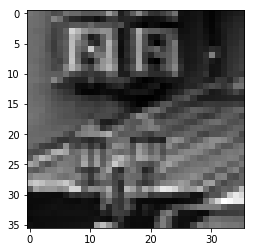

0


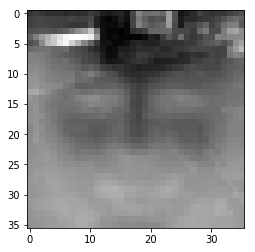

0


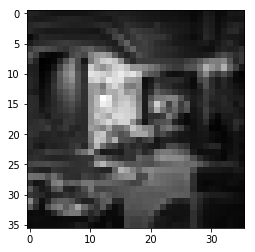

1


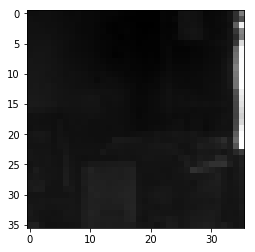

0


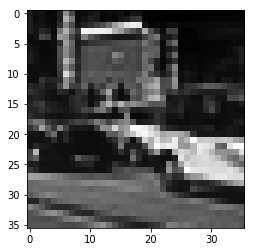

1


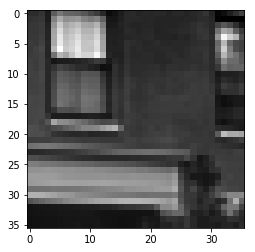

1


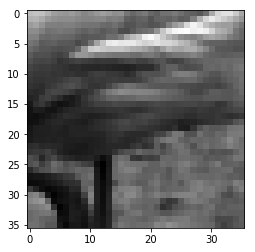

1


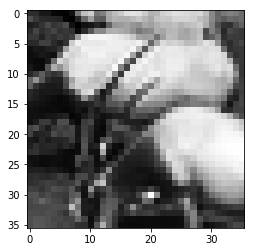

0


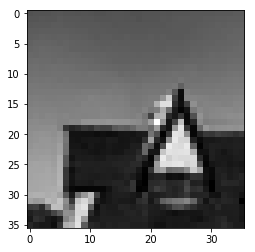

1


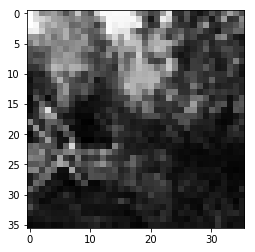

1


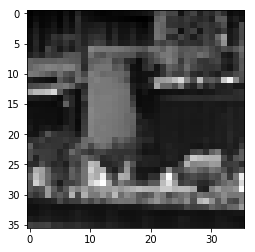

0


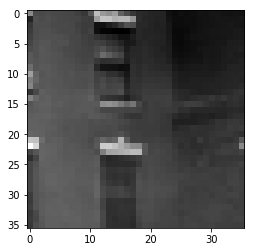

1


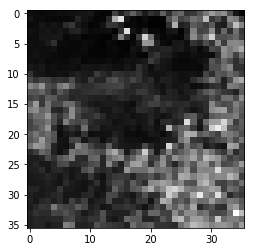

1


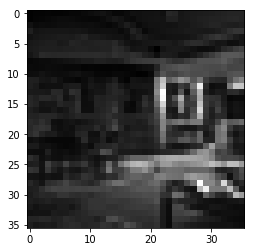

1


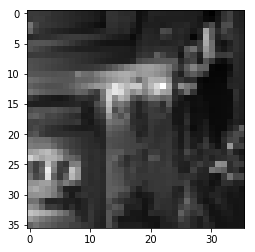

1


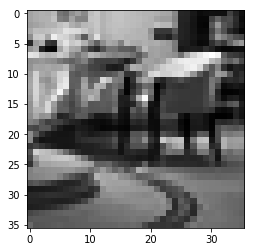

1


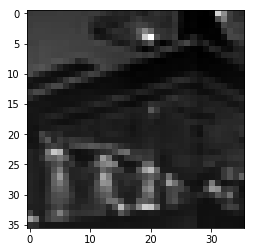

1


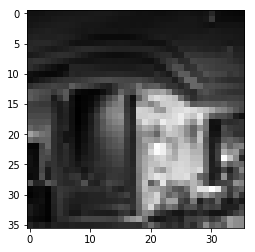

1


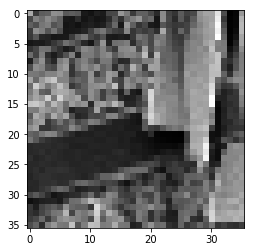

1


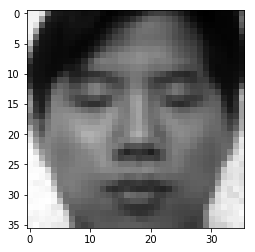

1


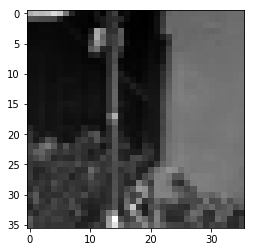

1


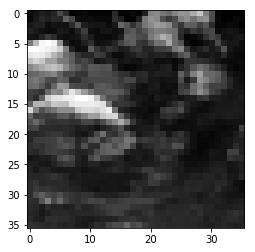

1


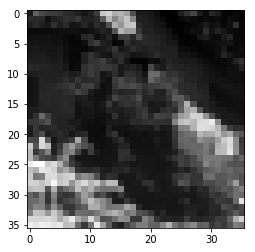

1


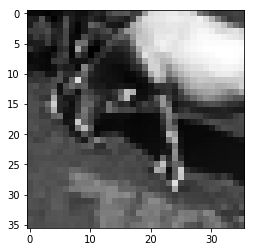

1


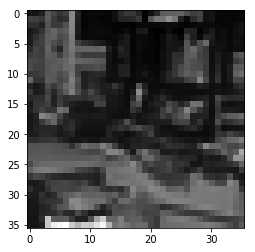

0


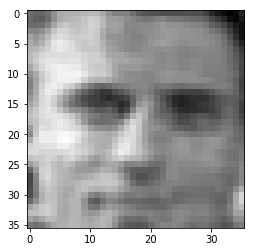

0


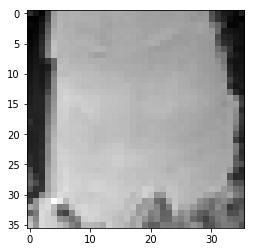

1


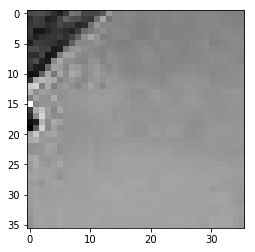

1


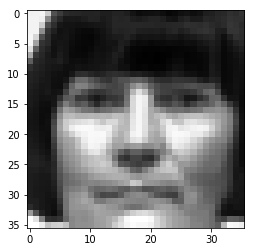

1


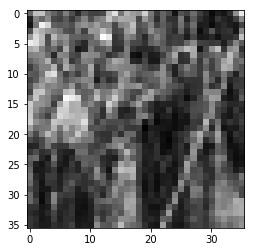

1


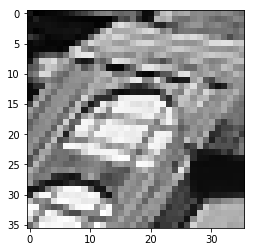

1


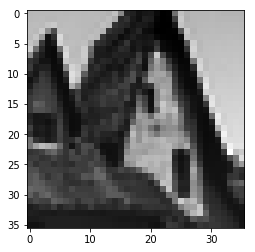

0


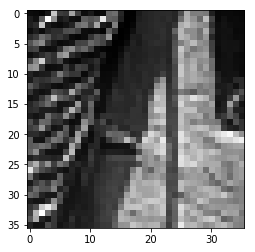

1


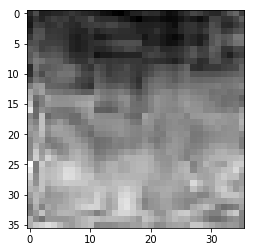

0


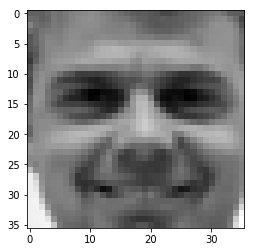

0


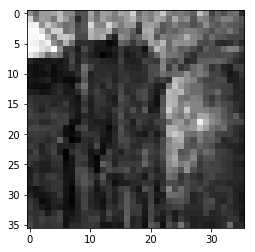

1


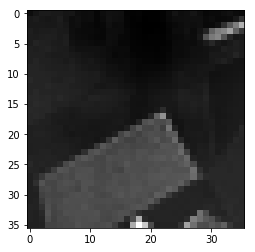

0


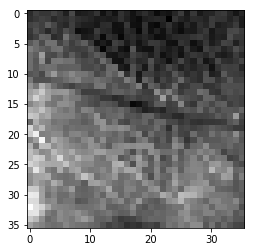

1


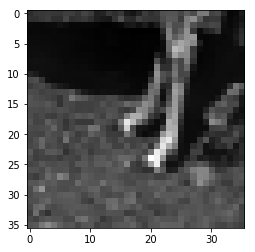

1


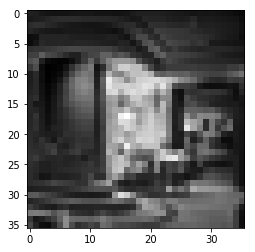

1


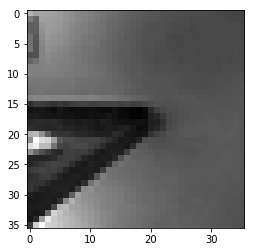

1


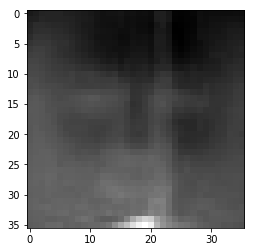

0


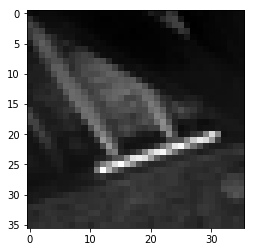

1


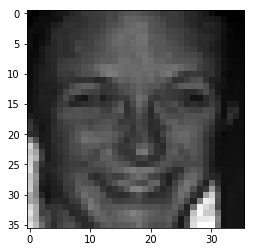

1


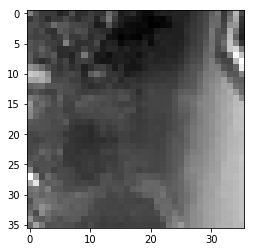

1


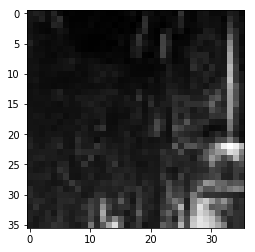

1


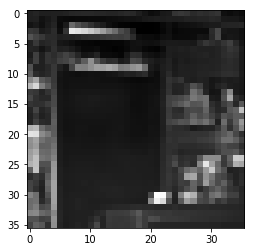

0


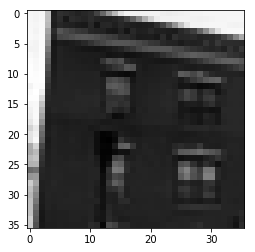

1


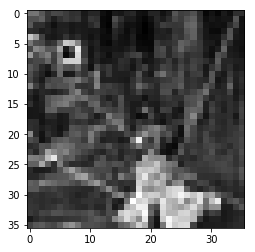

1


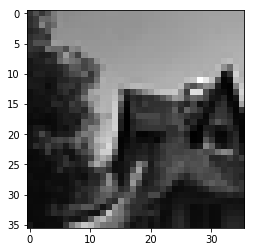

1


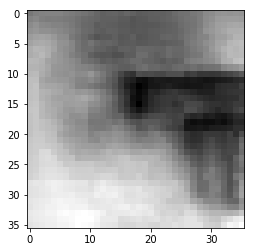

1


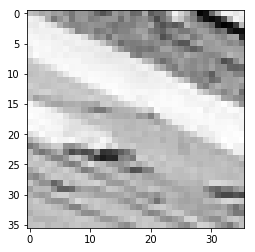

0


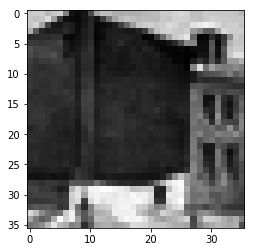

1


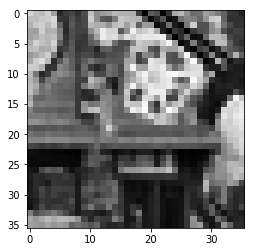

1


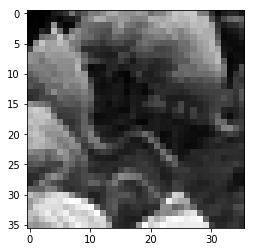

1


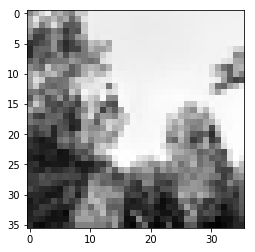

0


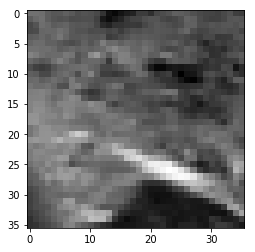

1


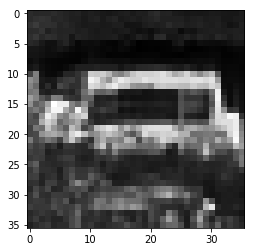

1


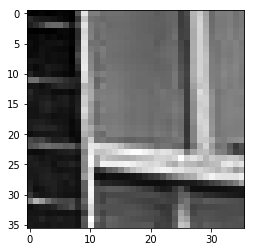

1


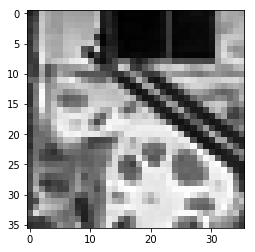

0


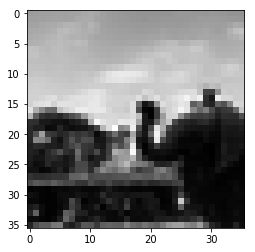

1


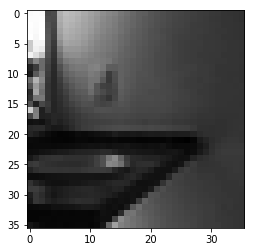

1


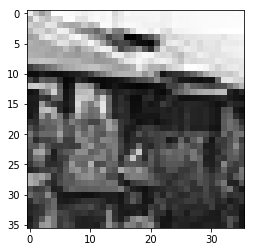

0


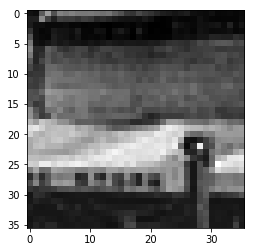

0


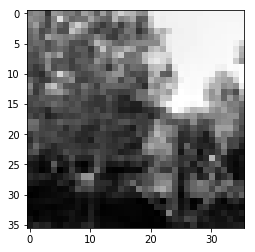

1


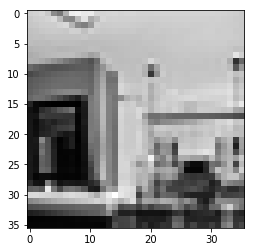

1


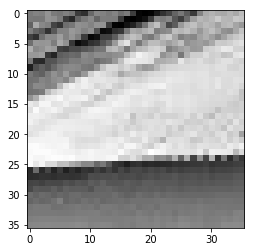

0


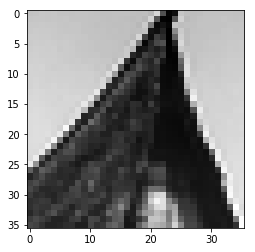

1


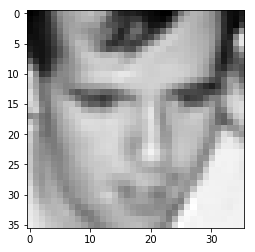

0


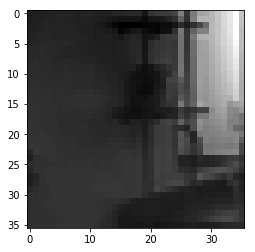

1


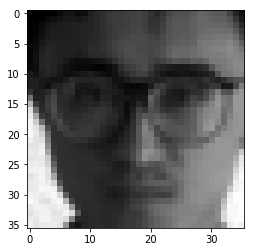

1


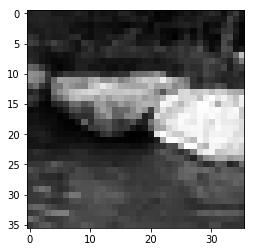

1


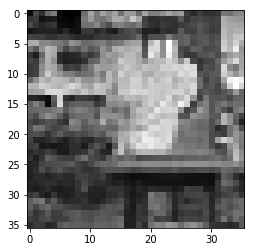

0


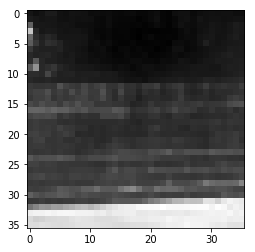

1


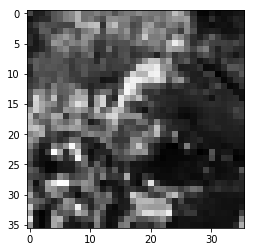

1


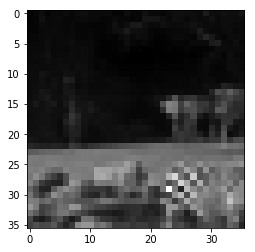

0


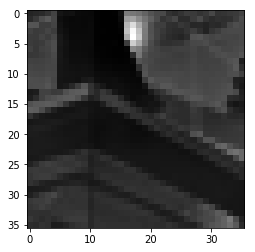

1


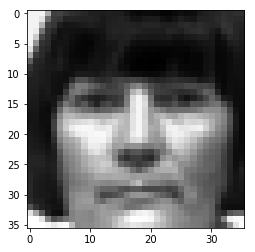

1


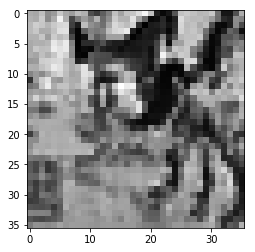

1


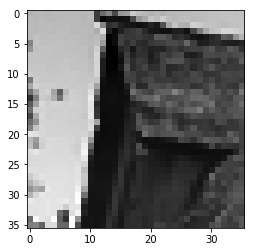

1


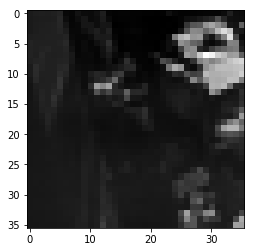

0


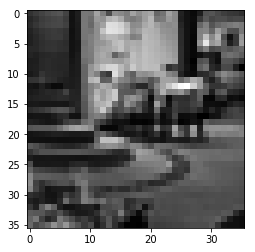

1


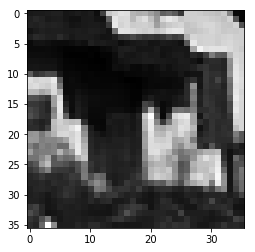

1


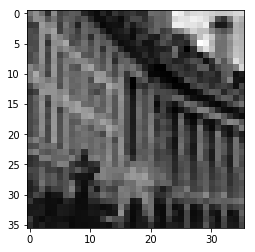

1


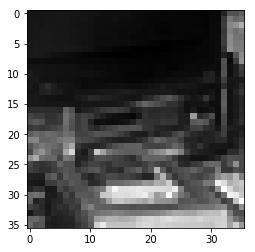

1


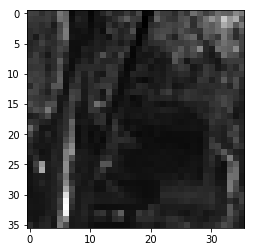

1


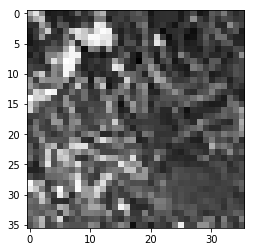

1


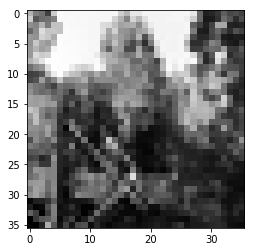

1


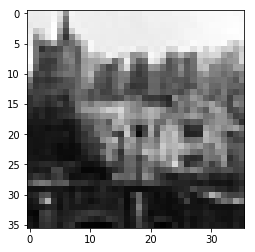

1


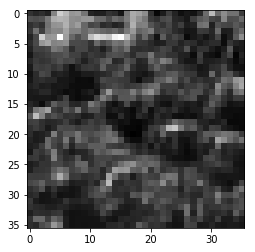

1


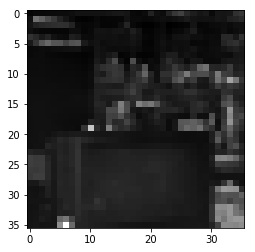

1


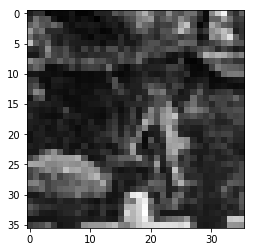

1


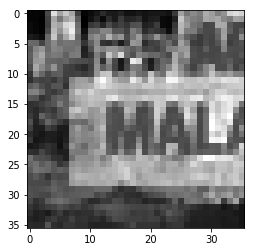

1


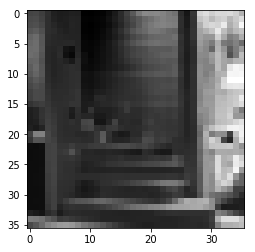

1


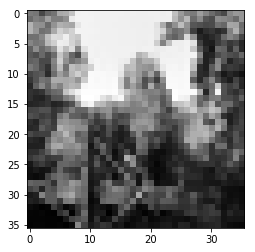

1


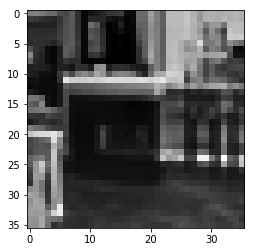

0


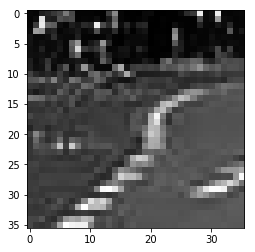

1


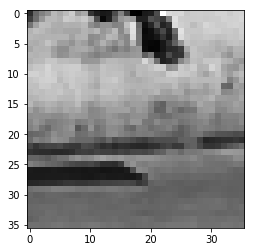

1


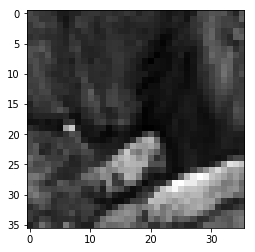

0


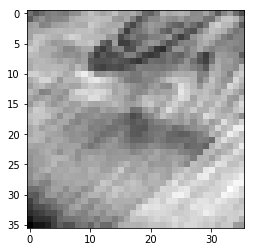

1


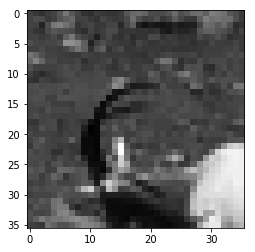

1


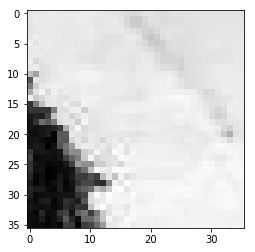

0


KeyboardInterrupt: 

In [62]:
for i in range(batch_size):
    plt.imshow(net_test.blobs['data'].data[i,0], cmap='gray')
    plt.show()
    print net_test.blobs['prob'].data[i].argmax()

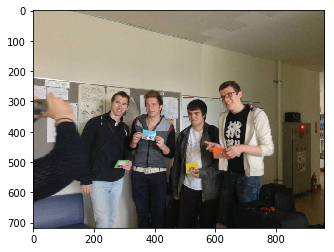

In [3]:
im = Image.open("../data/peoples.jpg")
plt.imshow(im)
plt.show()